In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import neattext.functions as nfx
from sklearn import svm
model = svm.SVC(kernel='linear')
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Emotion-Detection using text\Mental_Health\depression_anxiety_data.csv")
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


<Axes: xlabel='anxiousness', ylabel='count'>

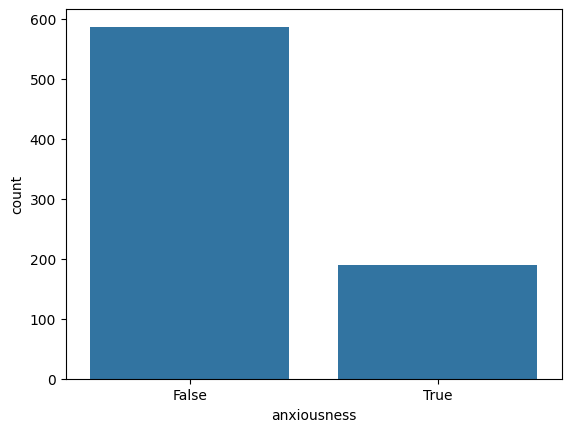

In [3]:
df['anxiousness'].value_counts()
sns.countplot(x='anxiousness', data=df)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['who_bmi'] = label_encoder.fit_transform(df['who_bmi'])
X = df[['age', 'bmi', 'gad_score' ]]
df = df.dropna()
df['anxiousness'] = df['anxiousness'].astype(int)
y = df['anxiousness']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(x_train,y_train) 
model.score(x_test,y_test)
   

1.0

In [ ]:
import joblib
pipeline_file= open("anxiety.pkl", "wb")
joblib.dump(model, pipeline_file)
pipeline_file.close()